In [2]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
# %matplotlib inline

In [6]:
data=pd.read_csv('00690.csv')
data.head(10)

,Date,Price
0,2017/3/31,19.91
1,2017/4/5,19.95
2,2017/4/6,19.93
3,2017/4/7,19.84
4,2017/4/10,19.80
5,2017/4/11,19.75
6,2017/4/12,19.72
7,2017/4/13,19.74
8,2017/4/14,19.70
9,2017/4/17,19.66


<Axes: >

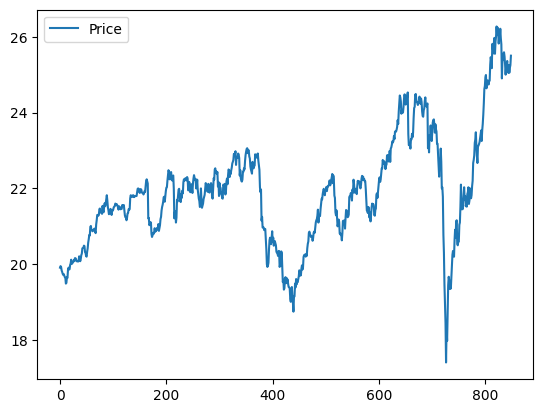

In [7]:
data.plot()

In [5]:
df=data.copy()
reg_up=linregress(x=df.index,y=df.Price)
reg_up

LinregressResult(slope=0.003095168893612516, intercept=20.602300921499342, rvalue=0.5102462071800008, pvalue=1.823788386546285e-57, stderr=0.00017925680135061827, intercept_stderr=0.08778874988959888)

In [7]:
reg_up.slope

0.0030951688936125157

In [8]:
reg_up[0]

0.0030951688936125157

In [9]:
up_line=reg_up[1]+reg_up[0]*df.index
up_line

C:\Users\tinah\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '2.6.2' or newer of 'numexpr' (version '2.6.1' currently installed).
  warnings.warn(msg, UserWarning)


Float64Index([20.602300921499342, 20.605396090392954, 20.608491259286566,
               20.61158642818018, 20.614681597073794, 20.617776765967406,
              20.620871934861018,  20.62396710375463, 20.627062272648242,
              20.630157441541854,
              ...
              23.199147623240243, 23.202242792133855, 23.205337961027467,
               23.20843312992108,  23.21152829881469, 23.214623467708307,
               23.21771863660192,  23.22081380549553, 23.223908974389143,
              23.227004143282755],
             dtype='float64', length=849)

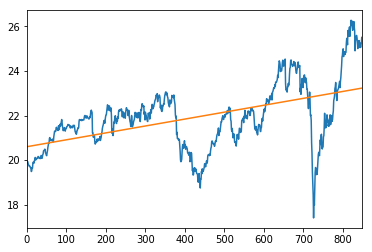

In [10]:
df.Price.plot()
plt.plot(up_line)

In [12]:
df_temp=df[df['Price']>up_line]
reg=linregress(x=df_temp.index,y=df_temp.Price)
df['HT']=reg[1]+reg[0]*data.index

In [13]:
df.head()

,Date,Price,HT
0,2017/3/31,19.91,20.924194
1,2017/4/5,19.95,20.928692
2,2017/4/6,19.93,20.933191
3,2017/4/7,19.84,20.937689
4,2017/4/10,19.80,20.942187


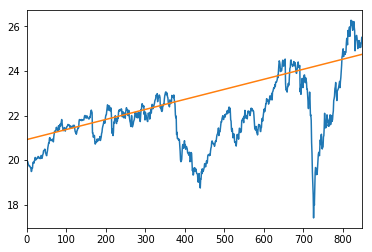

In [14]:
df.Price.plot()
plt.plot(df.HT)

In [15]:
while len(df_temp)>=5:
    reg=linregress(x=df_temp.index,y=df_temp.Price)
    up_line=reg[1]+reg[0]*data.index
    df_temp=df[df['Price']>up_line]

df['High_Trend']=reg[1]+reg[0]*data.index

In [16]:
df.head()

,Date,Price,HT,High_Trend
0,2017/3/31,19.91,20.924194,21.246872
1,2017/4/5,19.95,20.928692,21.252962
2,2017/4/6,19.93,20.933191,21.259052
3,2017/4/7,19.84,20.937689,21.265141
4,2017/4/10,19.80,20.942187,21.271231


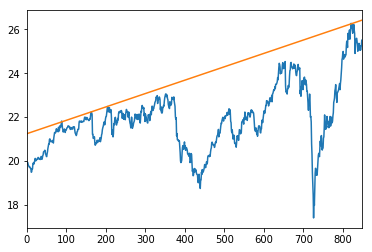

In [17]:
df['Price'].plot()
df['High_Trend'].plot()